## Compare linear vs GP emulators

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from matplotlib import cm
# our modules
import gp_emulator
import linear_emulator

In [2]:
basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
p1d_label='p1d'
skewers_label='Ns100_wM0.05'
# option to subsample the redshifts, to make lighter emulators
undersample_z=3

In [3]:
# specify parameters to emulate
emulate_pressure=True
emulate_growth=False
emulate_running=False
paramList=["mF","Delta2_p","sigT_Mpc","n_p","gamma","kF_Mpc"]

In [4]:
# setup GP emulator
if False:
    emu_gp_poly=gp_emulator.PolyfitGPEmulator(basedir,p1d_label,skewers_label,undersample_z=undersample_z,
                              verbose=True,paramList=paramList,kmax_Mpc=5)

In [5]:
# setup GP emulator
emu_gp_k=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,undersample_z=undersample_z,
                              verbose=True,paramList=paramList,kmax_Mpc=5,train=True)

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 2, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'alpha_star': {'ip': 3, 'min_val': -0.265, 'max_val': -0.165, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\alpha_\\star$'}, 'mu_He': {'ip': 4, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}, 'mu_H': {'ip': 5, 'min_val': 0.5, 'max_val': 2.0, '   latex': '$\\mu_{\\rm H}$'}}, 'nsamples': 10, 'samples': {'0': [0.972, 0.42000000000000004, -2.315, -0.19, 0.7250000000000001, 1.3250000000000002], '1': [0.96, 0.28, -2.295, -0.2, 1.3250000000000002, 1.475], '2': [0.966, 0.3, -2.305, -0.26, 1.025, 0.875], '3': [0.956, 0.4, -2.275, -0.25, 0.575, 1.175], '4': [0.968, 0.44, -2.325, -0.22, 1.475, 0.7250000000000001], '5': [

In [6]:
# setup linear emulator
emu_lin=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,undersample_z=undersample_z,
                                   emulate_running=emulate_running,emulate_pressure=emulate_pressure,
                                   emulate_growth=emulate_growth,verbose=True)

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 2, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'alpha_star': {'ip': 3, 'min_val': -0.265, 'max_val': -0.165, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\alpha_\\star$'}, 'mu_He': {'ip': 4, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}, 'mu_H': {'ip': 5, 'min_val': 0.5, 'max_val': 2.0, '   latex': '$\\mu_{\\rm H}$'}}, 'nsamples': 10, 'samples': {'0': [0.972, 0.42000000000000004, -2.315, -0.19, 0.7250000000000001, 1.3250000000000002], '1': [0.96, 0.28, -2.295, -0.2, 1.3250000000000002, 1.475], '2': [0.966, 0.3, -2.305, -0.26, 1.025, 0.875], '3': [0.956, 0.4, -2.275, -0.25, 0.575, 1.175], '4': [0.968, 0.44, -2.325, -0.22, 1.475, 0.7250000000000001], '5': [

In [7]:
# identify mean model
arxiv=emu_gp_k.arxiv
median_mF=np.median(arxiv.mF)
median_sigT_Mpc=np.median(arxiv.sigT_Mpc)
median_gamma=np.median(arxiv.gamma)
median_kF_Mpc=np.median(arxiv.kF_Mpc)
median_Delta2_p=np.median(arxiv.Delta2_p)
median_n_p=np.median(arxiv.n_p)
#median_alpha_p=np.median(arxiv.alpha_p)
#median_f_p=np.median(arxiv.f_p)
median_model={'mF':median_mF,'sigT_Mpc':median_sigT_Mpc,'gamma':median_gamma,'kF_Mpc':median_kF_Mpc,
            'Delta2_p':median_Delta2_p,'n_p':median_n_p}
print('mean model =',median_model)

mean model = {'mF': 0.64778419876579196, 'sigT_Mpc': 0.14306836275382434, 'gamma': 1.4567636112611044, 'kF_Mpc': 12.724404969454717, 'Delta2_p': 0.33183234326192357, 'n_p': -2.3000000281110902}


In [8]:
# predict 1D power for 
k_Mpc=np.logspace(-1,0.5,100)
p1d_lin=emu_lin.emulate_p1d_Mpc(median_model,k_Mpc)

asked to emulate model {'mF': 0.64778419876579196, 'sigT_Mpc': 0.14306836275382434, 'gamma': 1.4567636112611044, 'kF_Mpc': 12.724404969454717, 'Delta2_p': 0.33183234326192357, 'n_p': -2.3000000281110902}
evaluate point [  0.33183234  -2.30000003   0.6477842    0.14306836   1.45676361
  12.72440497]
got coefficients [-0.03317027 -0.12771445 -0.22170346 -0.58218117 -1.24191879]


In [9]:
p1d_gp_k=emu_gp_k.emulate_p1d_Mpc(median_model,k_Mpc)

<IPython.core.display.Javascript object>


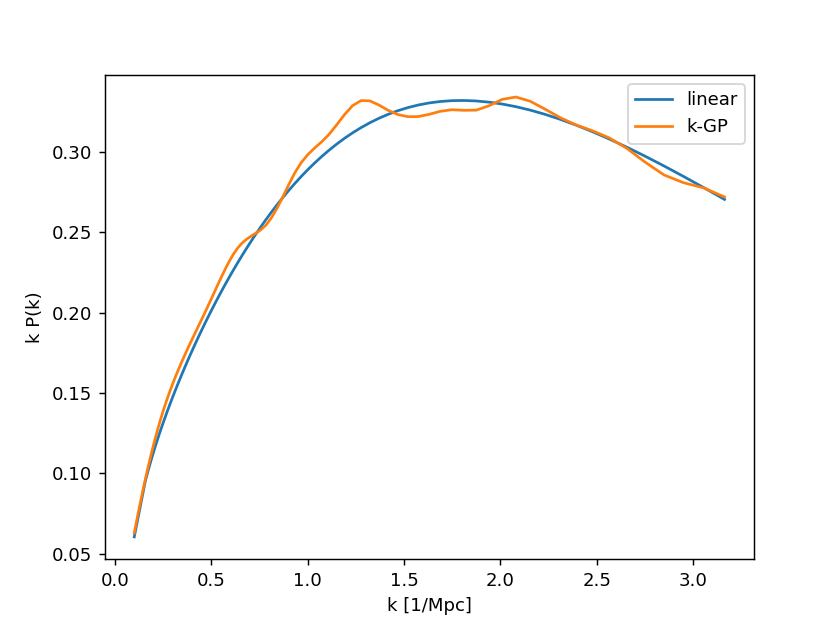

Text(0, 0.5, 'k P(k)')

In [10]:
plt.plot(k_Mpc,k_Mpc*p1d_lin,label='linear')
plt.plot(k_Mpc,k_Mpc*p1d_gp_k,label='k-GP')
plt.legend()
plt.xlabel('k [1/Mpc]')
plt.ylabel('k P(k)')